In [53]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from dotenv import load_dotenv
import requests
import json
import os
import datetime as dt
from tqdm import trange, tqdm
from census import Census
from us import states
from shapely.geometry import Polygon, Point
import time
import matplotlib as mpl

pd.options.display.max_columns = None

# load the environment variables
load_dotenv()

# set api key
census_key = os.environ.get('CENSUS_API_KEY')

In [4]:
if not os.path.exists("..\\..\\cjest-data\\"):
    print('Downloading file from internet')
    r = requests.get(cjest_url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall("..\\..\\cjest-data\\")

    start = time.perf_counter()
    cjest_df = gpd.read_file("..\\..\\cjest-data\\usa.zip")
    end = time.perf_counter()
    print(f"It took {(end-start)/60:3f} minutes to load the CJEST data")
else:
    print("Loading from previously saved file...")
    start = time.perf_counter()
    cjest_df = gpd.read_file("..\\..\\cjest-data\\usa.zip")
    end = time.perf_counter()
    print(f"It took {(end-start)/60:3f} minutes to load the CJEST data")

Loading from previously saved file...
It took 3.915765 minutes to load the CJEST data


In [12]:
%%time
us_map_url = "https://www2.census.gov/geo/tiger/TIGER2023/COUNTY/tl_2023_us_county.zip"
us_map = gpd.read_file(us_map_url)

CPU times: total: 8.83 s
Wall time: 30.5 s


In [6]:
us_contiguous = [state.name for state in states.STATES_CONTIGUOUS]
len(us_contiguous)

48

In [17]:
us_contiguous_fips = [s.fips for s in states.STATES_CONTIGUOUS]
len(us_contiguous_fips)

48

In [7]:
cejst_contiguous = cjest_df[cjest_df['SF'].isin(us_contiguous)]

In [9]:
new_england_states = ["Connecticut",
"Maine",
"Massachusetts",
"New Hampshire",
"Rhode Island",
"Vermont",]

In [14]:
mapping = states.mapping('name','fips')

In [15]:
new_england_fips = [mapping[s] for s in new_england_states]

In [10]:
new_england = cejst_contiguous[cejst_contiguous['SF'].isin(new_england_states)]

In [21]:
us_counties = us_map.copy()

In [22]:
us_map = us_map.dissolve('STATEFP')

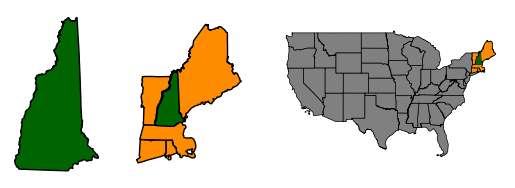

In [46]:
fig, axes = plt.subplots(1,3,gridspec_kw={'width_ratios':[1,1.25,2.5]})

nh_color = "darkgreen"
ne_color = "darkorange"
us_color = "gray"

us_map[us_map.index==mapping['New Hampshire']].plot(ax=axes[0], facecolor=nh_color, edgecolor='k',lw=1)

us_map[us_map.index.isin(new_england_fips)].plot(ax=axes[1], facecolor=ne_color, edgecolor='k',lw=1)
us_map[us_map.index==mapping['New Hampshire']].plot(ax=axes[1], facecolor=nh_color, edgecolor='k',lw=1)

us_map[us_map.index.isin(us_contiguous_fips)].plot(ax=axes[2], facecolor=us_color, edgecolor='k',lw=0.5)
us_map[us_map.index.isin(new_england_fips)].plot(ax=axes[2], facecolor=ne_color, edgecolor='k',lw=0.5)
us_map[us_map.index==mapping['New Hampshire']].plot(ax=axes[2], facecolor=nh_color, edgecolor='k',lw=0.1)

axes[0].set_axis_off()
axes[1].set_axis_off()
axes[2].set_axis_off()

In [40]:
new_hampshire_url = states.NH.shapefile_urls()['tract']

In [41]:
%%time
new_hampshire_gdf = gpd.read_file(new_hampshire_url)

CPU times: total: 141 ms
Wall time: 959 ms


In [43]:
new_hampshire_gdf.columns

Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10',
       'INTPTLAT10', 'INTPTLON10', 'geometry'],
      dtype='object')

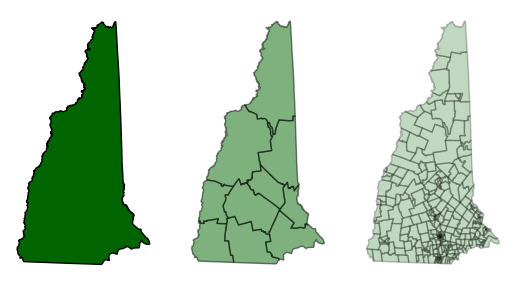

In [49]:
fig, axes = plt.subplots(1,3,gridspec_kw={'width_ratios':[1,1,1]})

new_hampshire_gdf.dissolve('STATEFP10').plot(ax=axes[0], facecolor=nh_color,edgecolor='k',lw=1, alpha=1)
new_hampshire_gdf.dissolve('COUNTYFP10').plot(ax=axes[1], facecolor=nh_color,edgecolor='k',lw=1, alpha=0.5)
new_hampshire_gdf.plot(ax=axes[2], facecolor=nh_color,edgecolor='k',lw=1, alpha=0.25)

axes[0].set_axis_off()
axes[1].set_axis_off()
axes[2].set_axis_off()

# axes.set_axis_off()

In [50]:
rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False}

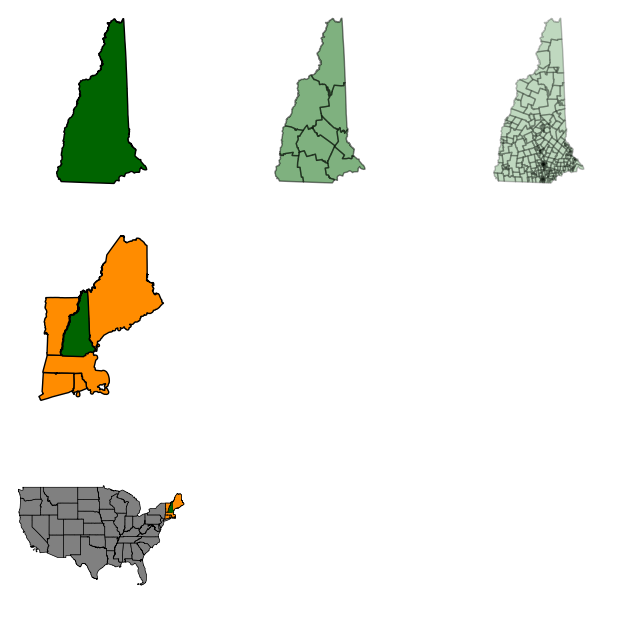

In [58]:
with mpl.rc_context(rc):

    fig, axes = plt.subplots(3,3, figsize=(8,8))

    nh_color = "darkgreen"
    ne_color = "darkorange"
    us_color = "gray"
    
    
    new_hampshire_gdf.dissolve('COUNTYFP10').plot(ax=axes[0,1], facecolor=nh_color,edgecolor='k',lw=1, alpha=0.5)
    new_hampshire_gdf.plot(ax=axes[0,2], facecolor=nh_color,edgecolor='k',lw=1, alpha=0.25)
    

    us_map[us_map.index==mapping['New Hampshire']].plot(ax=axes[0,0], facecolor=nh_color, edgecolor='k',lw=1)

    us_map[us_map.index.isin(new_england_fips)].plot(ax=axes[1,0], facecolor=ne_color, edgecolor='k',lw=1)
    us_map[us_map.index==mapping['New Hampshire']].plot(ax=axes[1,0], facecolor=nh_color, edgecolor='k',lw=1)

    us_map[us_map.index.isin(us_contiguous_fips)].plot(ax=axes[2,0], facecolor=us_color, edgecolor='k',lw=0.5)
    us_map[us_map.index.isin(new_england_fips)].plot(ax=axes[2,0], facecolor=ne_color, edgecolor='k',lw=0.5)
    us_map[us_map.index==mapping['New Hampshire']].plot(ax=axes[2,0], facecolor=nh_color, edgecolor='k',lw=0.1)

    # axes[0].set_axis_off()
    # axes[1].set_axis_off()
    # axes[2].set_axis_off()